
## Homework # 1 AI 240 Machine Learning Course

### Rob Taylor
Spring 2025
Instructor - Dr. Uma Gajendragadkar


##  Salary Prediction with Linear Regression Algorithm

### Learning Topic - Linear Regression Algorithm in Machine Learning
 
### Problem - To develop a machine learning model to predict salary.

# Import libraries

## Step 1: Import the required python packages
Write code to import Pandas for data manipulation, NumPy for mathematical calculations, and MatplotLib, and Seaborn for visualizations, Sklearn libraries used for machine learning operations

In [71]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2 - Import data

Write code to read data into pandas dataframe

In [6]:
salaries = pd.read_csv('Salary_Data.csv')

## Step 3 - Look at data 
Write code to display top 5 and bottom 5 rows

In [44]:
print(salaries.head())
print(salaries.tail())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
    YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


## Step 4  Analyze data

 Write code to describe data

In [47]:
salaries.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Step 5 Check Distribution of data
### Write code to draw distplot using seaborn library

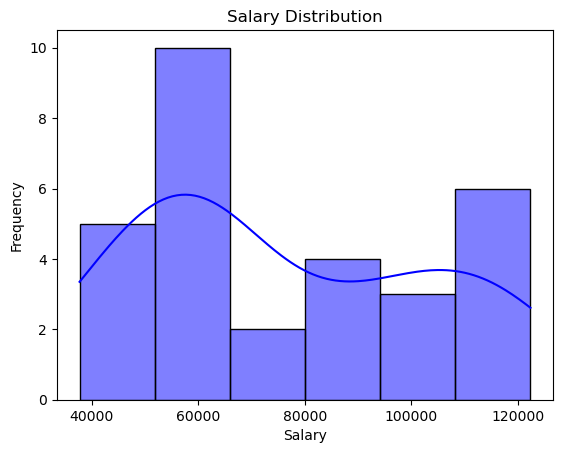

In [192]:
# Since distplot is being deprecated, I switched to histplot. 
sns.histplot(data=salaries, x='Salary', kde=True, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

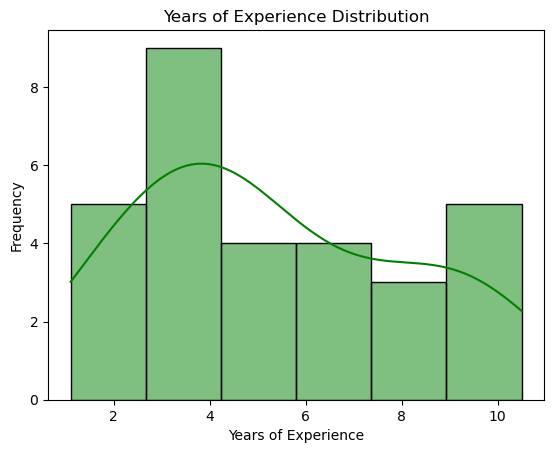

In [77]:
# Since distplot is being deprecated, I switched to histplot. 
sns.histplot(data=salaries, x='YearsExperience', kde=True, color='green')
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

## Find Relationship between Salary and Experience

### Write code to draw scatterplot between salary and experience and see how they are correlated.

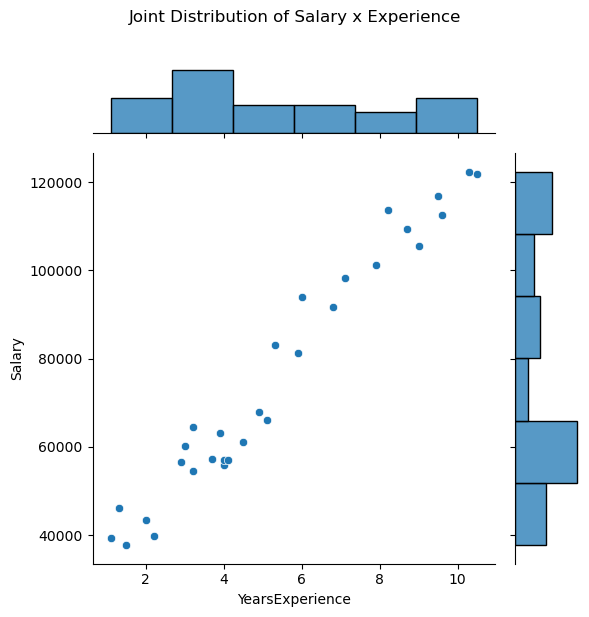

In [190]:
# playing with different plots. scatter plot is one option, but I liked the kde more.
sns.jointplot(data=salaries, x='YearsExperience', y='Salary', kind='scatter')
plt.suptitle('Joint Distribution of Salary x Experience', y=1.02)
plt.tight_layout()
plt.show()

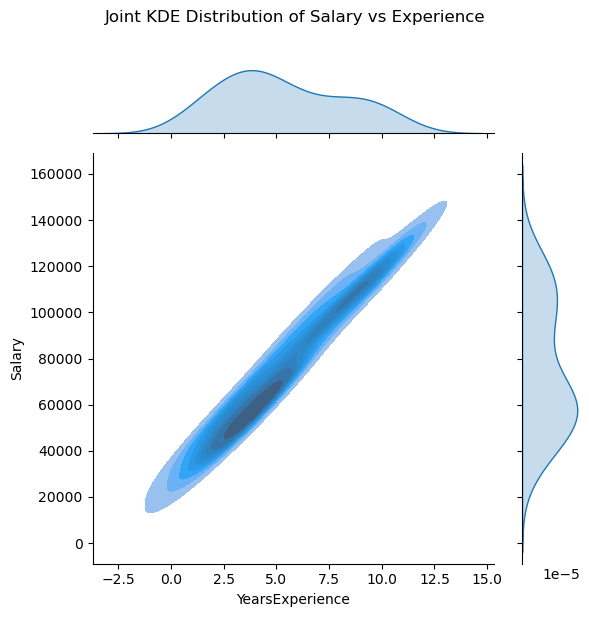

In [188]:
# This one looks cool!
sns.jointplot(data=salaries, x='YearsExperience', y='Salary', kind='kde', fill=True)
plt.suptitle('Joint KDE Distribution of Salary vs Experience', y=1.02)
plt.tight_layout()
plt.show()

## Step 6 Split data

## Split into Independent/Dependent variables

### Write code to Split into Independent/Dependent variables x and y
Experience (X) is the independent variable
Salary (y) is dependent on experience

In [73]:
# Split the data into training and testing sets
X = salaries[['YearsExperience']] # Double bracket for dataframe
print(X.head())

y = salaries['Salary'] # single bracke for a series
print(y.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64


## Step 7 Split into Train/Test sets

### Write code to divide data into training and test set (80/20 ratio)

In [75]:
# use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 8 Train model

## Write code to train the model using Linear Regression Algorithm

In [83]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

## Step 9  Predict results

### Write code to predict the results

In [143]:
# Make predictions
y_pred = model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred })

print(results.head())

      Actual      Predicted
27  112635.0  115790.210113
15   67938.0   71498.278095
23  113812.0  102596.868661
17   83088.0   75267.804224
8    64445.0   55477.792045


## Step 10 Visualize predictions

## Prediction on training set

### Write code to Plot the training and test results
Its time to test our predicted results by plotting graphs

Write code to Plot training set data vs predictions
First we plot the result of training sets (X_train, y_train) with X_train and predicted value of y_train (regressor.predict(X_train))

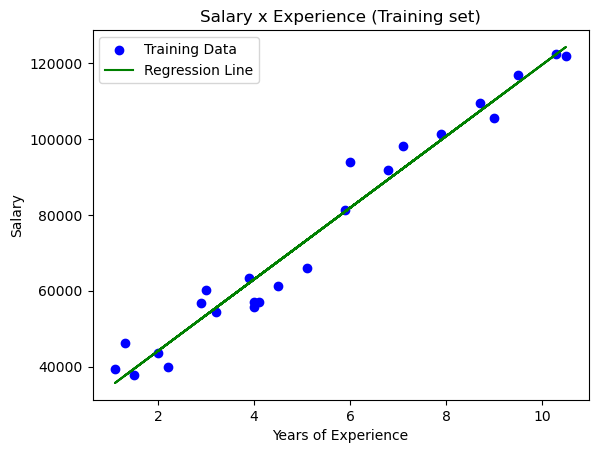

In [186]:
# Show the training data and the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='green', label='Regression Line')

# Add title and axis labels
plt.title('Salary x Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Prediction on test set

### Write code to Plot test set data vs predictions
we plot the result of test sets (X_test, y_test) with X_train and predicted value of y_train (regressor.predict(X_train))

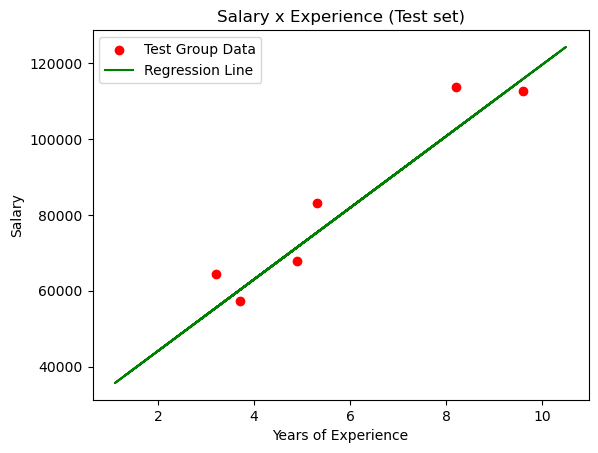

In [184]:
# Show the test data against the regression line
plt.scatter(X_test, y_test, color='red', label='Test Group Data')
plt.plot(X_train, model.predict(X_train), color='green', label='Regression Line')

# Add title and axis labels
plt.title('Salary x Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Write code to plot the prediction on test set

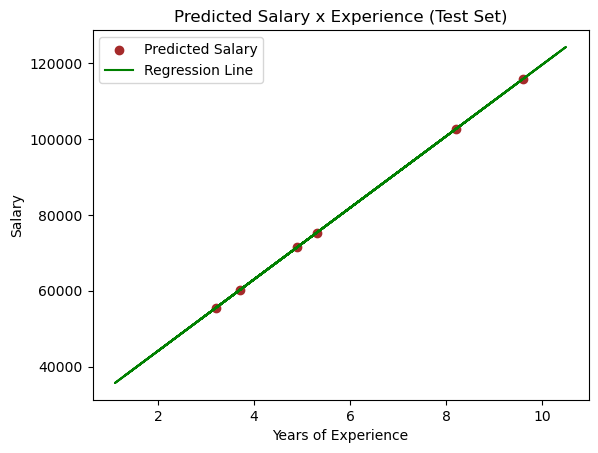

In [180]:
# Test results on test set
plt.scatter(X_test, y_pred, color='brown', label='Predicted Salary')

# Regression line based on predicted test values
plt.plot(X_train, model.predict(X_train), color='green', label='Regression Line')

# Add title and axis labels
plt.title('Predicted Salary x Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

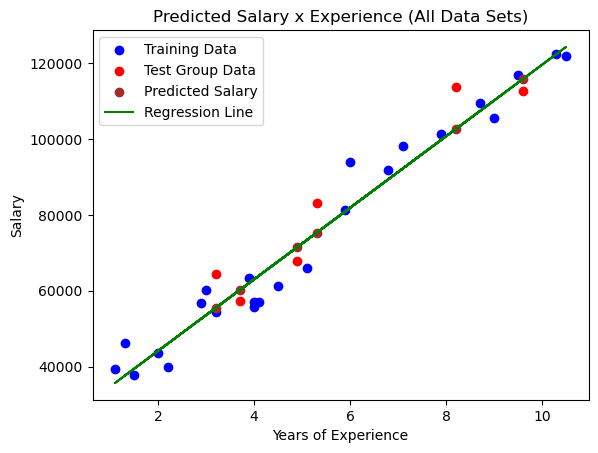

In [182]:
# All together now :)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Group Data')
plt.scatter(X_test, y_pred, color='brown', label='Predicted Salary')
plt.plot(X_train, model.predict(X_train), color='green', label='Regression Line')

# Add title and axis labels
plt.title('Predicted Salary x Experience (All Data Sets)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Step 11  Coefficient and Intercept

### Write code to find coefficient and intercept
we discussed the linear equation y = mx + c, we can also get the c (y-intercept) and m (slope/coefficient) from the regressor model.

In [178]:
coefficient = model.coef_[0] # coefficient = slope
intercept = model.intercept_ # y-intercept

print("Coefficient (slope):", coefficient)
print("Intercept:", intercept)

equation = f"y = {coefficient:.2f}x + {intercept:.2f}"
print("Linear Regression Equation:", equation)

# My Sample
x_value = 5

# Calculate using the equation y = mx + c
y_value = coefficient * x_value + intercept
print()
print(f"For {x_value} years of experience, expected salary = ${y_value:.0f}")

Coefficient (slope): 9423.815323030976
Intercept: 25321.583011776813
Linear Regression Equation: y = 9423.82x + 25321.58

For 5 years of experience, expected salary = $72441
